In [3]:
import pandas as pd
from tqdm import *
import numpy as np
import feather as fe
import re
from floweaver import *
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
data = fe.read_dataframe('data_post_EDu')

In [41]:
data_science.highest_edu_field_cat.value_counts()

Other    935
Arts     886
Stat     767
Engg     755
CS       727
DS       628
Biz      433
Name: highest_edu_field_cat, dtype: int64

In [8]:
data[data.current_job_title_refined=='Data Scientist'].shape

(5131, 68)

In [9]:
data_science = data[data.current_job_title_refined=='Data Scientist'].copy()

In [ ]:
sums = data_science.groupby(data_science.location).count()
plt.axis('equal')
plt.pie(sums, labels=sums.index);
plt.show()

In [44]:
data_science = pd.read_csv('data_science.csv')

In [4]:
data_science.to_csv('data_science.csv', index=False)

In [18]:
data_science.data_current_comp_namef=data_science.data_current_comp_namef.replace('Metis Solutions','Metis')

In [3]:
def get_state(x):
    if x is None:
        return ''
    lst= str(x).split(',')
    if len(lst)>1:
        return lst[1]
    else:
        return ''
data_science['loc_state'] = data_science.location.apply(get_state)

In [70]:
data_science.head()

,additional_info,rb,name,id,summary_title,location,current_job_company,current_job_title,current_job_desc,current_job_duration,prev_job_company,prev_job_title,prev_job_desc,prev_job_duration,total_exp_durations,education1_title,education1_college,education1_duration,education2_title,education2_college,education2_duration,education3_title,education3_college,education3_duration,skils,links,certifications,awards,work_auth,current_job_duration_months,prev_job_duration_months,total_exp_durations_months,work_authp,prev_job_desc_clean,prev_job_title_cats,0,1,2,3,4,5,6,7,8,9,10,11,current_job_title_refined,has_github,has_linked,highest_edu_level,highest_edu_field_cat,data_current_comp_name,data_current_comp_type,data_current_comp_employee,data_current_comp_name1,data_current_comp_type1,data_current_comp_employee1,data_current_comp_name2,data_current_comp_type2,data_current_comp_employee2,data_current_comp_namef,data_current_comp_typef,data_current_comp_employeef,uni_corr,tier_education1_college,tier_education2_college,uni_corr2,loc_state
0,"['TECHNICAL SKILLS\xa0', <br/>, '\xa0', <br/>,...",NaN,Tracy-Ruan,c47f7ac095973653?sp=0,Data Scientist Intern,"San Francisco, CA",NaN,Data Scientist Intern,['• Prepared customer behavior datasets for cl...,August 2017 to November 2017,NaN,Web Designer Assistant,['• Maintained university website (HTML ...,September 2015 to January 2016,"['August 2017 to November 2017', 'September 20...",B.S. in Data Science,university san francisco,January 2013 to May 2017,NaN,NaN,NaN,NaN,NaN,NaN,"[['JAVASCRIPT (Less than 1 year)'], ['PYTHON (...",['https://github.com/tracyruan007'],[],[],Authorized to work in the US for any employer,3,4,8,1.0,"['maintained', 'university', 'website', 'html'...",Software Engg,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.736292,0.006410,0.006410,0.199605,0.006410,0.006411,Data Scientist,1,0,Bachelor,DS,NantHealth,public,922.0,NaN,NaN,NaN,NaN,NaN,NaN,NantHealth,public,922.0,NaN,6.0,6.0,NaN,CA
1,"['TECHNICAL SKILLS:\xa0', <br/>, 'Languages ...",NaN,Sai-Nadimpalli,19e0d35744cc56a6?sp=0,Junior Data Scientist,"Kansas City, MO",Sprint Corporation,Junior Data Scientist,['• Developed a Hybrid Recommendation System f...,May 2017 to August 2017,['IBM'],Software Development Engineer Intern,['• Developed Web and Android Applications for...,September 2015 to January 2016,"['May 2017 to August 2017', 'September 2015 to...",Master of Science in Computer Science in Compu...,university missouri,May 2018,Technology,K L University,May 2016,NaN,NaN,NaN,"[['C (Less than 1 year)'], ['CSS (Less than 1 ...",[],[],[],NaN,3,4,7,NaN,"['developed', 'web', 'android', 'application',...",Student,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.956348,0.003968,0.003968,Data Scientist,0,0,Masters,CS,Sprint Corporation,subsidiary,69735.0,Sprint Corporation,subsidiary,69735.0,Sprint Corporation,subsidiary,69735.0,Sprint Corporation,subsidiary,69735.0,NaN,6.0,6.0,NaN,MO
2,"['TECHNICAL SKILLS\xa0', <br/>, '• Proficien...",NaN,Nick-Shi,accfd33784428f69?sp=0,Data Scientist Intern,"Malibu, CA",MarketPsych Data,Data Scientist Intern,['• Manipulated and interpreted insights fro...,February 2018 to Present,NaN,Technical Consultant,['• Manipulated 12 year historical option da...,January 2018 to Present,"['February 2018 to Present', 'January 2018 to ...",Master of Science in Applied Finance,pepperdine university graziadio school busines...,December 2017,Master of Science in Computing,Imperial College London,October 2016,Bachelor of Science in Software Engineering,"The University of Nottingham, School of Comput...",July 2015,"[['PYTHON (Less than 1 year)'], ['SQL (Less th...",['http://www.linkedin.com/in/nick-shi'],[],[],Sponsorship required to work in the US,1,2,12,0.0,"['manipulated', '12', 'year', 'historical', 'o...",Project Manager,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005209,0.005208,0.005208,0.005209,0.005208,0.942707,Data Scientist,0,1,Masters,Other,NaN,NaN,0.

In [79]:
def fstate(row):
    count = row['state_count']
    state = row['loc_state']
    if count>100:
        return state
    else: 
        return 'Others'

In [97]:
def fcity(row):
    count = row['city_count']
    state = row['location']
    if count>40:
        return state
    else: 
        return 'Others'

In [80]:
data_science['fstate']  = data_science.apply(fstate, axis='columns')

In [98]:
data_science['fcity']  = data_science.apply(fcity, axis='columns')

In [81]:
data_science.fstate.value_counts()

Others    1278
 CA       1037
 NY        486
 TX        474
 NJ        268
 IL        251
 WA        210
 VA        201
 MA        200
 NC        137
 MD        126
 PA        120
 GA        119
 CO        116
 FL        108
Name: fstate, dtype: int64

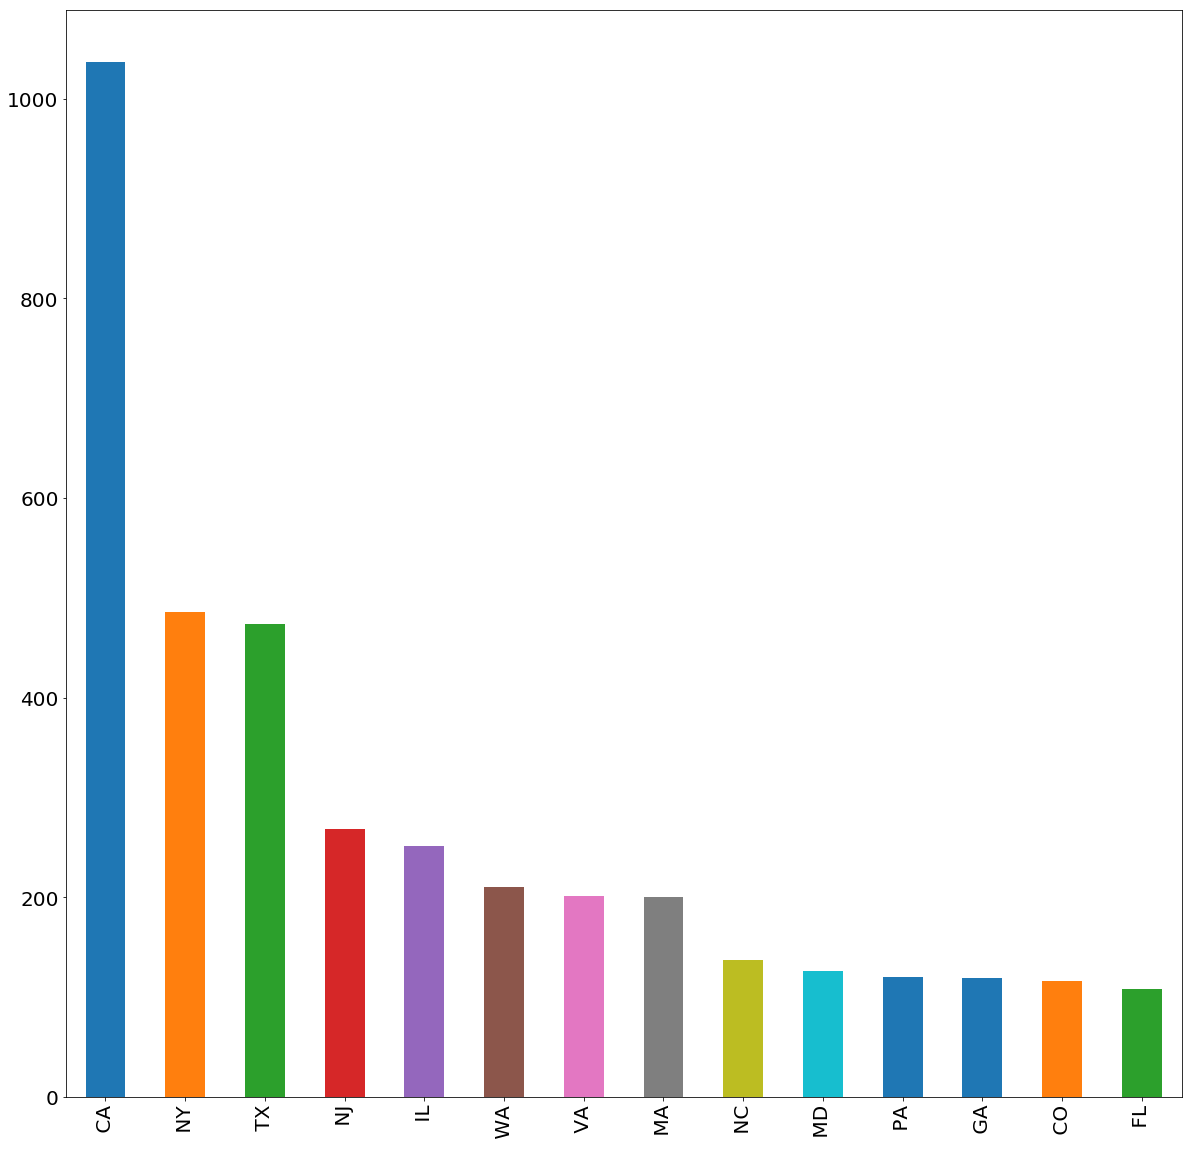

In [82]:
data_science[data_science.fstate!='Others'].fstate.value_counts().plot(kind='bar', figsize = (20,20), fontsize=20)

In [99]:
data_science['city_count']= data_science.location.map(data_science.location.value_counts())

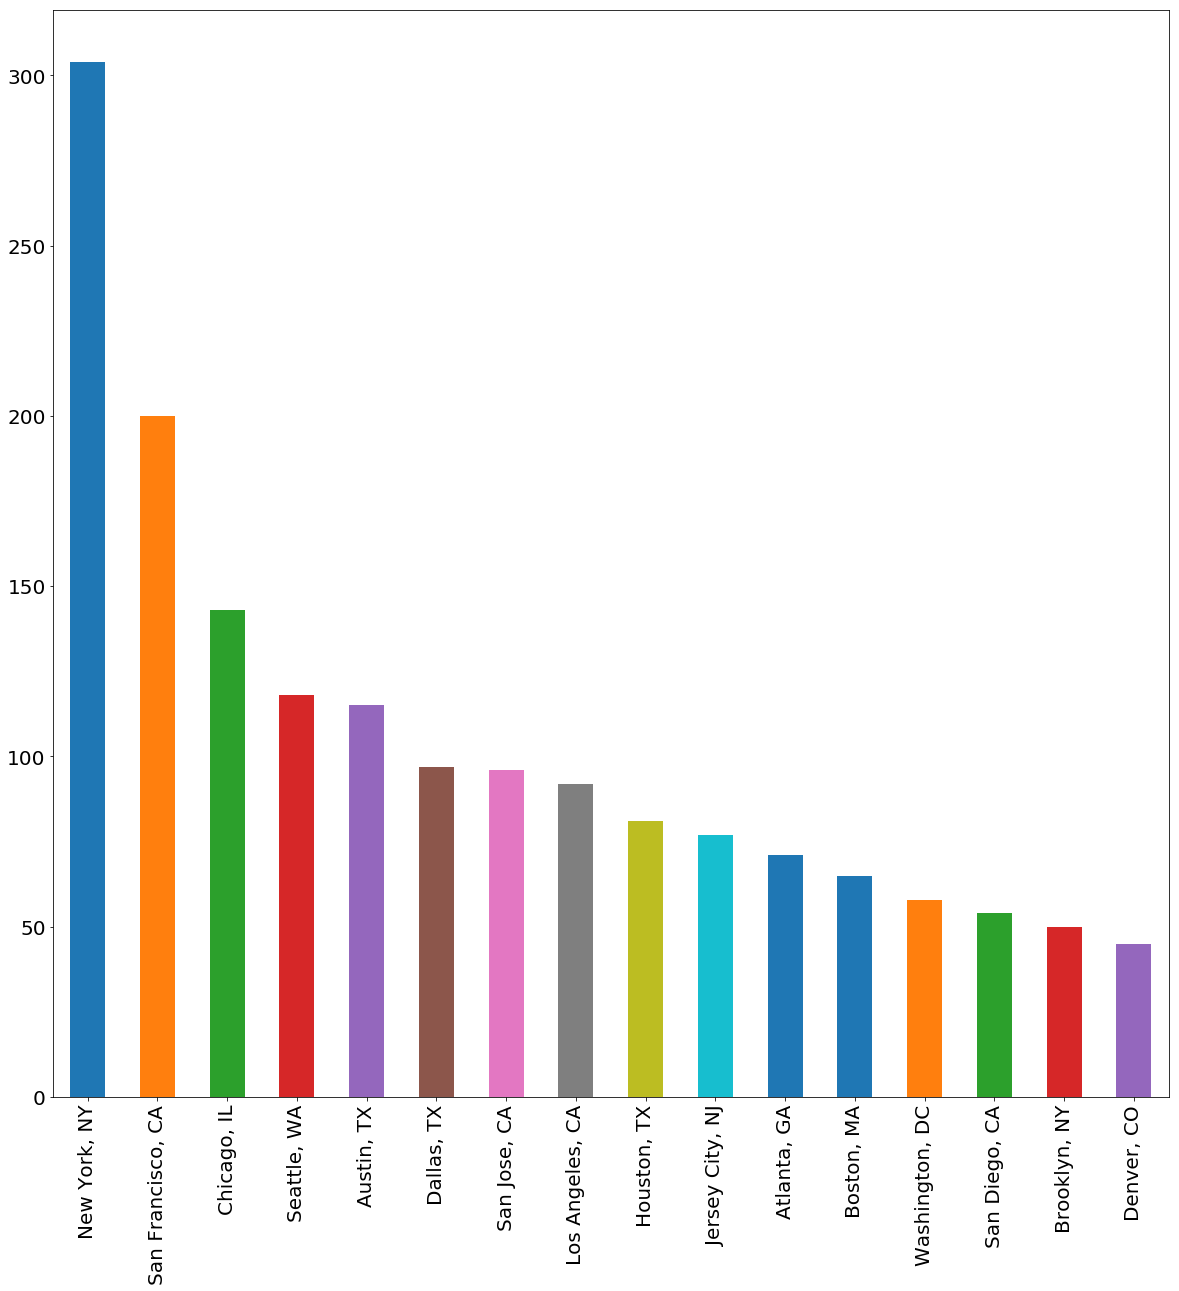

In [100]:
data_science[data_science.fcity!='Others'].fcity.value_counts().plot(kind='bar', figsize = (20,20), fontsize=20)

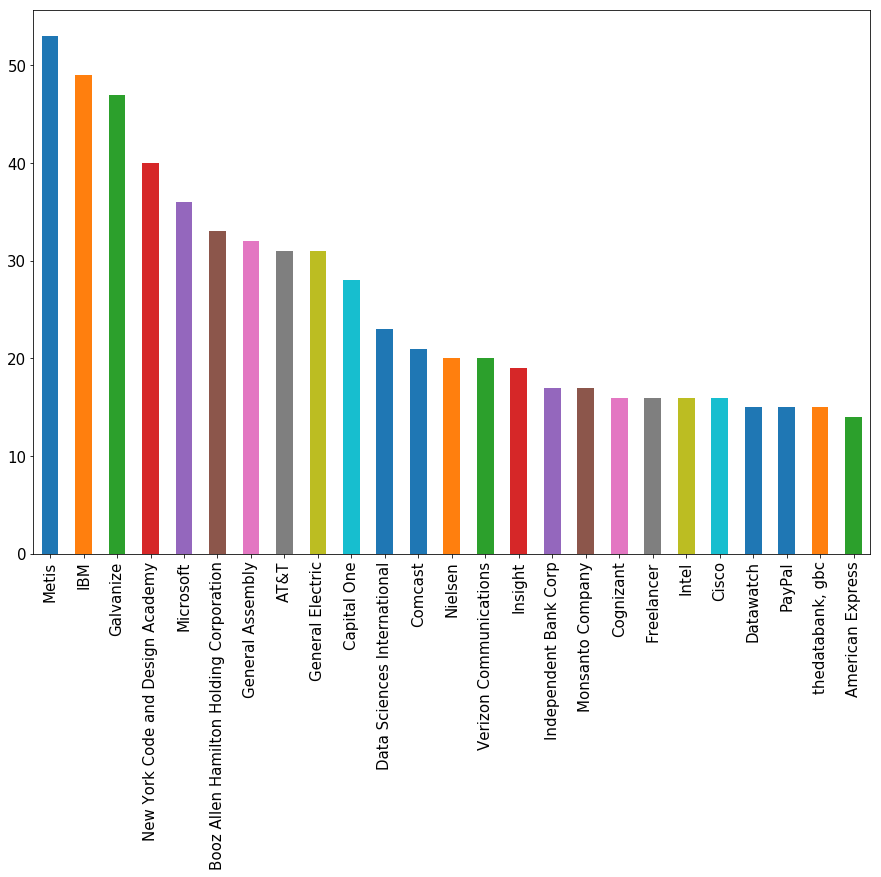

In [184]:
data_science.data_current_comp_namef.value_counts()[0:25].plot(kind='bar', figsize = (15,10), fontsize=15)

In [13]:
data_science[data_science.data_current_comp_namef=='Metis Solution'].data_current_comp_namef.re

In [30]:
data_science.prev_job_title_cats.value_counts()

Data Scientist      1370
Student             1268
Others               925
Business Analyst     461
Data Analyst         441
Software Engg        342
Project Manager      324
Name: prev_job_title_cats, dtype: int64

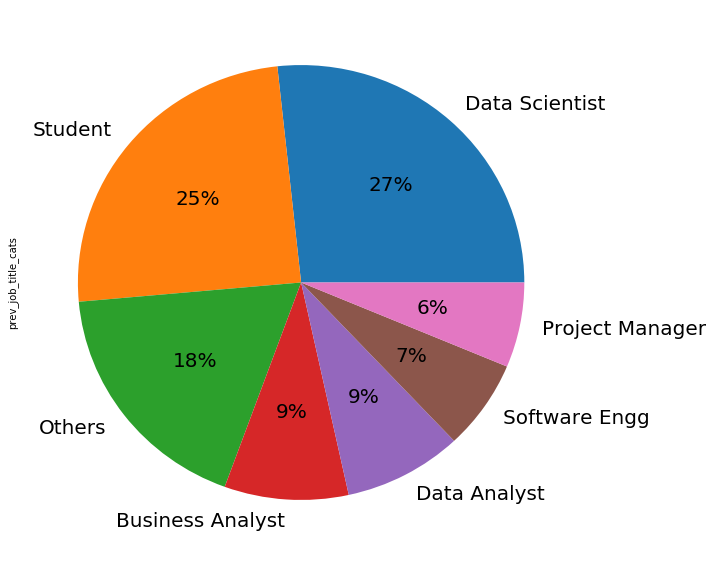

In [38]:
data_science.prev_job_title_cats.value_counts().plot(kind='pie', figsize = (10,10), fontsize=20, autopct='%.0f%%')

In [61]:
data_science[data_science.prev_job_title_cats=='Student'].highest_edu_field_cat.value_counts()

In [88]:
data_science.highest_edu_field_cat=data_science.highest_edu_field_cat.replace('Engg','Engineering')

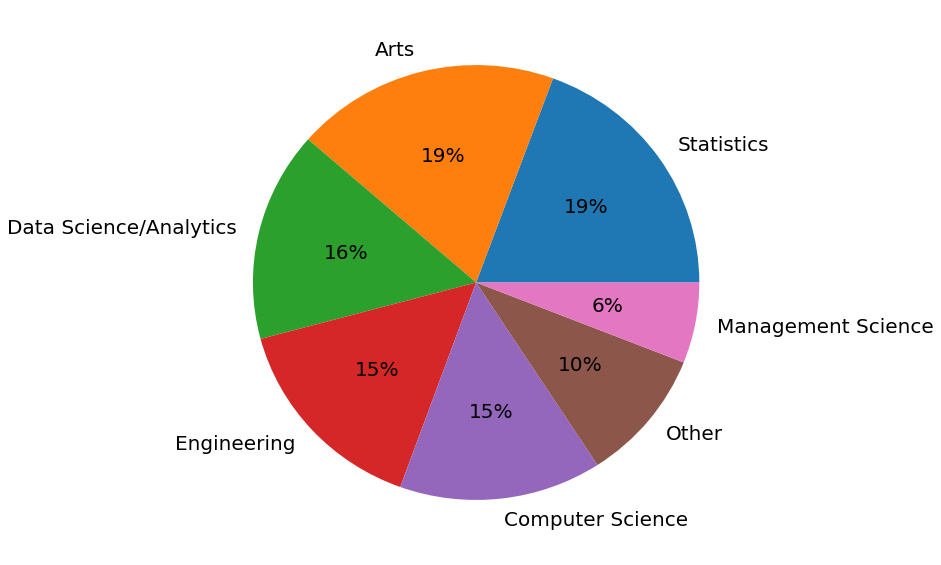

In [89]:
plt.axis('off')
data_science[data_science.prev_job_title_cats=='Student'].highest_edu_field_cat.value_counts().plot(kind='pie', figsize = (10,10), fontsize=20, autopct='%.0f%%')

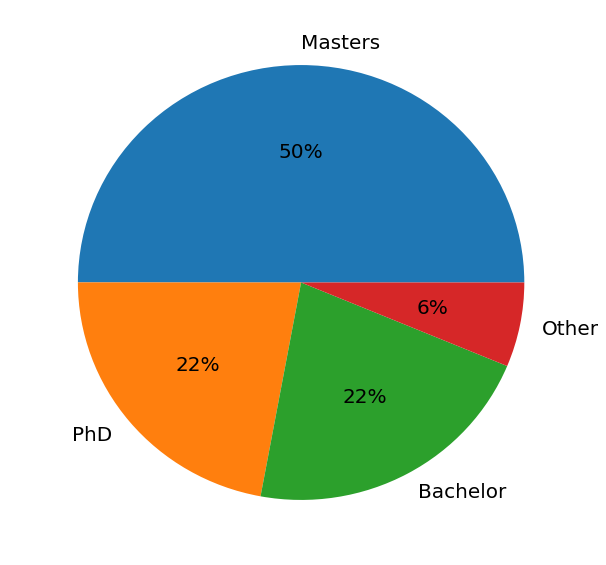

In [92]:
plt.axis('off')
data_science.highest_edu_level.value_counts().plot(kind='pie', figsize = (10,10), fontsize=20, autopct='%.0f%%')

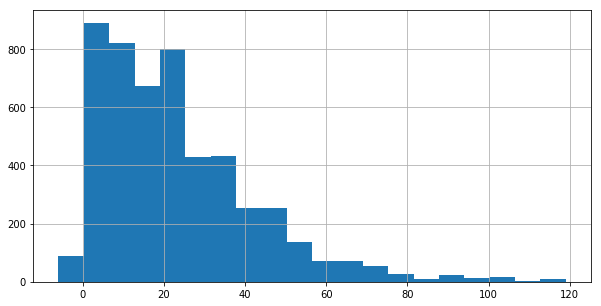

In [118]:
data_science[data_science.current_job_duration_months<120].current_job_duration_months.hist(bins=20, figsize = (10,5))

In [105]:
data_science.current_job_duration_months.mean()

24.837848372636913

In [146]:
skills_list =[]
for i in data_science.skils.iteritems():
    skil = i[1]
    this_list = re.findall(r'\[+(.*?)\(',i[1])
    skills_list = skills_list+this_list

In [142]:
re.findall(r'\[+(.*?)\(',i[1])

["'JAVASCRIPT ", "'PYTHON ", "'STATISTICS ", "'CSS ", "'HTML "]

In [155]:
final_skills_list =[x.lower().replace("'", '').strip().upper() for x in skills_list]

In [162]:
ab=pd.DataFrame({'skills':final_skills_list}).skills.value_counts()

Text(0.5,0,'Skill')

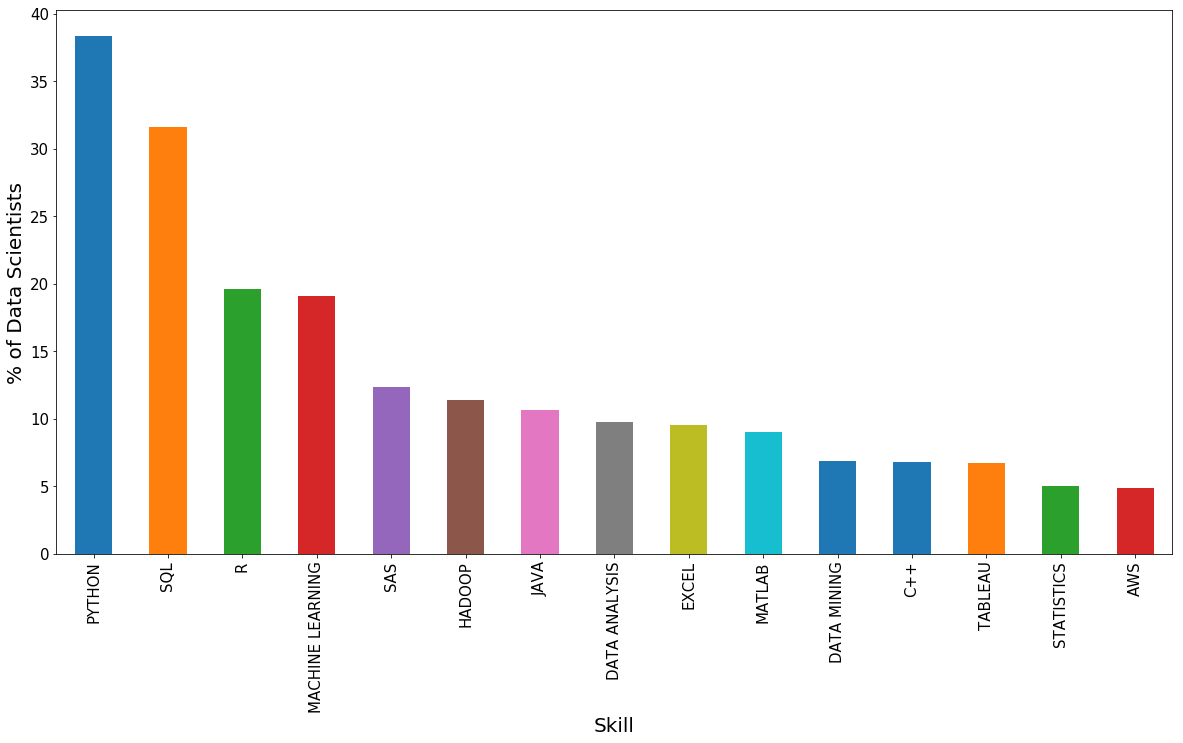

In [180]:
ax= (ab/40)[0:15].plot(kind='bar', figsize = (20,10), fontsize=15)
ax.set_ylabel("% of Data Scientists",fontsize=20)
ax.set_xlabel('Skill', fontsize=20)

In [17]:
import pandas as pd
flows = pd.read_csv('simple_fruit_sales.csv')

In [125]:
import plotly
plotly.tools.set_credentials_file(username='devm2024', api_key='oJDGwwmFWsnm60kIpMbT')

In [45]:
data_science.head()

,additional_info,rb,name,id,summary_title,location,current_job_company,current_job_title,current_job_desc,current_job_duration,prev_job_company,prev_job_title,prev_job_desc,prev_job_duration,total_exp_durations,education1_title,education1_college,education1_duration,education2_title,education2_college,education2_duration,education3_title,education3_college,education3_duration,skils,links,certifications,awards,work_auth,current_job_duration_months,prev_job_duration_months,total_exp_durations_months,work_authp,prev_job_desc_clean,prev_job_title_cats,0,1,2,3,4,5,6,7,8,9,10,11,current_job_title_refined,has_github,has_linked,highest_edu_level,highest_edu_field_cat,data_current_comp_name,data_current_comp_type,data_current_comp_employee,data_current_comp_name1,data_current_comp_type1,data_current_comp_employee1,data_current_comp_name2,data_current_comp_type2,data_current_comp_employee2,data_current_comp_namef,data_current_comp_typef,data_current_comp_employeef,uni_corr,tier_education1_college,tier_education2_college,uni_corr2,loc_state
0,"['TECHNICAL SKILLS\xa0', <br/>, '\xa0', <br/>,...",NaN,Tracy-Ruan,c47f7ac095973653?sp=0,Data Scientist Intern,"San Francisco, CA",NaN,Data Scientist Intern,['• Prepared customer behavior datasets for cl...,August 2017 to November 2017,NaN,Web Designer Assistant,['• Maintained university website (HTML ...,September 2015 to January 2016,"['August 2017 to November 2017', 'September 20...",B.S. in Data Science,university san francisco,January 2013 to May 2017,NaN,NaN,NaN,NaN,NaN,NaN,"[['JAVASCRIPT (Less than 1 year)'], ['PYTHON (...",['https://github.com/tracyruan007'],[],[],Authorized to work in the US for any employer,3,4,8,1.0,"['maintained', 'university', 'website', 'html'...",Software Engg,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.736292,0.006410,0.006410,0.199605,0.006410,0.006411,Data Scientist,1,0,Bachelor,Data Science/Analytics,NantHealth,public,922.0,NaN,NaN,NaN,NaN,NaN,NaN,NantHealth,public,922.0,NaN,6.0,6.0,NaN,CA
1,"['TECHNICAL SKILLS:\xa0', <br/>, 'Languages ...",NaN,Sai-Nadimpalli,19e0d35744cc56a6?sp=0,Junior Data Scientist,"Kansas City, MO",Sprint Corporation,Junior Data Scientist,['• Developed a Hybrid Recommendation System f...,May 2017 to August 2017,['IBM'],Software Development Engineer Intern,['• Developed Web and Android Applications for...,September 2015 to January 2016,"['May 2017 to August 2017', 'September 2015 to...",Master of Science in Computer Science in Compu...,university missouri,May 2018,Technology,K L University,May 2016,NaN,NaN,NaN,"[['C (Less than 1 year)'], ['CSS (Less than 1 ...",[],[],[],NaN,3,4,7,NaN,"['developed', 'web', 'android', 'application',...",Student,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.956348,0.003968,0.003968,Data Scientist,0,0,Masters,Computer Science,Sprint Corporation,subsidiary,69735.0,Sprint Corporation,subsidiary,69735.0,Sprint Corporation,subsidiary,69735.0,Sprint Corporation,subsidiary,69735.0,NaN,6.0,6.0,NaN,MO
2,"['TECHNICAL SKILLS\xa0', <br/>, '• Proficien...",NaN,Nick-Shi,accfd33784428f69?sp=0,Data Scientist Intern,"Malibu, CA",MarketPsych Data,Data Scientist Intern,['• Manipulated and interpreted insights fro...,February 2018 to Present,NaN,Technical Consultant,['• Manipulated 12 year historical option da...,January 2018 to Present,"['February 2018 to Present', 'January 2018 to ...",Master of Science in Applied Finance,pepperdine university graziadio school busines...,December 2017,Master of Science in Computing,Imperial College London,October 2016,Bachelor of Science in Software Engineering,"The University of Nottingham, School of Comput...",July 2015,"[['PYTHON (Less than 1 year)'], ['SQL (Less th...",['http://www.linkedin.com/in/nick-shi'],[],[],Sponsorship required to work in the US,1,2,12,0.0,"['manipulated', '12', 'year', 'historical', 'o...",Project Manager,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005209,0.005208,0.005208,0.005209,0.005208,0.942707,Data Scie

In [ ]:
- current(DS)- prevjob(stude, DS, PM, SF, OT)- prev edu(STU, BRANCH)

In [ ]:
data_science.groupby([ 'highest_edu_field_cat','highest_edu_level','current_job_title_refined','prev_job_title_cats']).count().reset_index()[['prev_job_title_cats', 'current_job_title_refined','highest_edu_field_cat','highest_edu_level','name']]

In [140]:
data_science.groupby([ 'highest_edu_field_cat','highest_edu_level','current_job_title_refined','prev_job_title_cats']).count().reset_index()[['prev_job_title_cats', 'current_job_title_refined','highest_edu_field_cat','highest_edu_level','name']].to_csv('graph2.csv',index=False)

In [49]:
level1=data_science.groupby(['prev_job_title_cats', 'current_job_title_refined']).count().reset_index()[['prev_job_title_cats', 'current_job_title_refined', 'name']]

In [66]:
level_edu_level = data_science.groupby(['prev_job_title_cats', 'highest_edu_field_cat']).count().reset_index()[['prev_job_title_cats', 'highest_edu_field_cat', 'name']]

In [68]:
level_edu_cat = data_science.groupby(['highest_edu_field_cat', 'highest_edu_level']).count().reset_index()[['highest_edu_field_cat', 'highest_edu_level', 'name']]

In [76]:
level1.current_job_title_refined= level1.current_job_title_refined.replace('Data Scientist', 'Current Data Scientist')

In [77]:
level1

,prev_job_title_cats,current_job_title_refined,name
0,Business Analyst,Current Data Scientist,461
1,Data Analyst,Current Data Scientist,441
2,Data Scientist,Current Data Scientist,1370
3,Others,Current Data Scientist,925
4,Project Manager,Current Data Scientist,324
5,Software Engg,Current Data Scientist,342
6,Student,Current Data Scientist,1268


In [67]:
level_edu_level

,prev_job_title_cats,highest_edu_field_cat,name
0,Business Analyst,Arts,74
1,Business Analyst,Computer Science,44
2,Business Analyst,Data Science/Analytics,73
3,Business Analyst,Engineering,57
4,Business Analyst,Management Science,72
5,Business Analyst,Other,63
6,Business Analyst,Statistics,78
7,Data Analyst,Arts,63
8,Data Analyst,Computer Science,53
9,Data Analyst,Data Science/Analytics,69


In [69]:
level_edu_cat

,highest_edu_field_cat,highest_edu_level,name
0,Arts,Bachelor,246
1,Arts,Masters,210
2,Arts,PhD,430
3,Computer Science,Bachelor,188
4,Computer Science,Masters,381
5,Computer Science,PhD,158
6,Data Science/Analytics,Bachelor,26
7,Data Science/Analytics,Masters,583
8,Data Science/Analytics,PhD,19
9,Engineering,Bachelor,178


In [99]:
source = []
target = []
count =[]
source = source + list(level_edu_cat.highest_edu_level)+list(level_edu_level.highest_edu_field_cat)+list(level1.prev_job_title_cats)
target = target +list(level_edu_cat.highest_edu_field_cat) +list(level_edu_level.prev_job_title_cats)+list(level1.current_job_title_refined)
count = count +list(level_edu_cat.name) +list(level_edu_level.name)+list(level1.name)

In [100]:
all_labs= set(list(np.unique(target))+list(np.unique(source)))

In [101]:
graph = pd.DataFrame({'source':source, 'target': target, 'value': count})

In [136]:
graph.to_csv('graph.csv', index=False)

In [134]:
import plotly.plotly as py

import urllib, json
import urllib.request

urls = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
with urllib.request.urlopen(urls) as url:
    res = url.read()

data = json.loads(res)

data_trace = dict(
    type='sankey',
    width = 1118,
    height = 772,
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    valuesuffix = "TWh",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  list(all_labs),
      color =  data['data'][0]['node']['color'][0:18]
    ),
    link = dict(
      source =  source,
      target =  target,
      value =  count
  ))

layout =  dict(
    title = "Journey of a Data Scientist",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)

In [135]:
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
      thickness = 30,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  list(all_labs),
      color = data['data'][0]['node']['color'][0:18]
    ),
    link = dict(
      source =  source,
      target =  target,
      value =  count
  )
)

layout =  dict(
    title = "Refugee movement through Manus and Nauru, via <a href='http://www.bryanbrussee.com/sankey.html'>Bryan Brussee</a>",
    height = 772,
    width = 950,
    font = dict(
      size = 10
    ),    
)


fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)